In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
#import geopandas as gpd

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
df = pd.read_csv('Ranking of United States cities by area.csv')

**Анализируем данные**

In [7]:
df.head()

,Rank,City,State,Land area (sq mi),(km2),Water area (sq mi),(km2).1,Total area (sq mi),(km2).2,Population (2020)
0,1,Sitka,Alaska,"2,870.10","7,434","1,945.10","5,038","4,815.10","12,471","8,458"
1,2,Juneau,Alaska,"2,704.00","7,003",550.7,"1,426","3,254.70","8,430","32,255"
2,3,Wrangell,Alaska,"2,556.00","6,620",920.6,"2,384","3,476.60","9,004","2,127"
3,4,Anchorage,Alaska,"1,706.80","4,421",239.9,621,"1,946.70","5,042","2,91,247"
4,5,Tribune,Kansas,778.2,"2,016",0,0,778.2,"2,016","1,182"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Rank                150 non-null    int64 
 1   City                150 non-null    object
 2   State               150 non-null    object
 3   Land area (sq mi)   150 non-null    object
 4    (km2)              150 non-null    object
 5   Water area (sq mi)  150 non-null    object
 6    (km2).1            150 non-null    object
 7   Total area (sq mi)  150 non-null    object
 8    (km2).2            150 non-null    object
 9   Population (2020)   150 non-null    object
dtypes: int64(1), object(9)
memory usage: 11.8+ KB


Исходя из информации видно, что в датасете **нет пропущенных данных**

Однако числовые данные (площадь и население) представлены в виде категориальных данных. Для анализа в последаствии изменим тип представленных данных

In [9]:
# Просмотрим названия штатов, чтобы не встречались сокращения и т.п.
df['State '].unique()

array(['Alaska', 'Kansas', 'Florida', 'Montana', 'Texas', 'Oklahoma',
       'Arizona', 'Tennessee', 'California', 'Georgia', 'Virginia',
       'Indiana', 'Kentucky', 'Missouri', 'North Carolina', 'New York',
       'Illinois', 'Ohio', 'Alabama', 'Nevada', 'Colorado', 'New Mexico',
       'Minnesota', 'Louisiana', 'Nebraska', 'Michigan', 'South Carolina',
       'Pennsylvania', 'Oregon', 'Arkansas', 'Mississippi', 'Utah',
       'Wisconsin', 'Iowa', 'Idaho', 'Washington', 'Maryland', 'Maine',
       'South Dakota'], dtype=object)

In [10]:
# Так как анализ площадей буду производить на основании кв. километров, то значения в милях удаляем
df.drop(labels=['Land area (sq mi)', 'Water area (sq mi)', 'Total area (sq mi)'], axis=1, inplace=True)

In [11]:
# Для удобства переименовываем названия категорий (столбцов)
df = df.rename(columns={'City ': 'City', 'State ': 'State', ' (km2)': 'Land area, km2', ' (km2).1': 'Water area, km2', ' (km2).2': 'Total area, km2'})

In [12]:
# Убираем ',' чтобы не мешали
df['Land area, km2'] = df['Land area, km2'].apply(lambda x: x.replace(',',''))
df['Water area, km2'] = df['Water area, km2'].apply(lambda x: x.replace(',',''))
df['Total area, km2'] = df['Total area, km2'].apply(lambda x: x.replace(',',''))
df['Population (2020)'] = df['Population (2020)'].apply(lambda x: x.replace(',',''))

In [13]:
# Изменяем тип данных числовых критериев
df['Land area, km2'] = df['Land area, km2'].astype('float64')
df['Water area, km2'] = df['Water area, km2'].astype('float64')
df['Total area, km2'] = df['Total area, km2'].astype('float64')
df['Population (2020)'] = df['Population (2020)'].astype('int64')

# Анализ данных о городах в общем (в масштабах страны)

**Топ 10 городов страны по количеству жителей**

In [14]:
df = df.sort_values(by='Population (2020)', ascending=False)
df_10_pop = df.head(10)

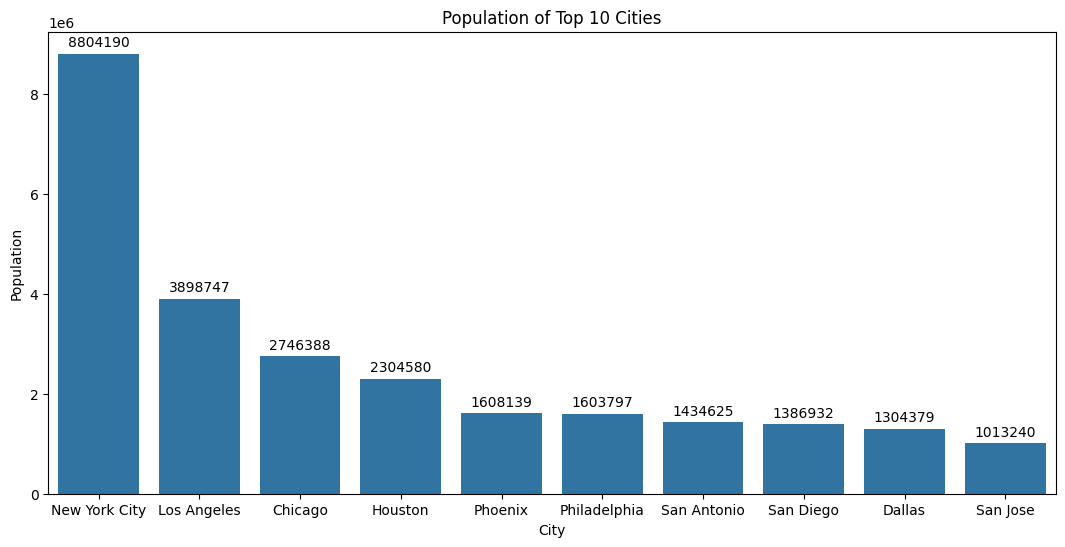

In [15]:
plt.figure(figsize=(13, 6))
plots = sns.barplot(x='City', y='Population (2020)', data=df_10_pop) 

for bar in plots.patches: 
    plots.annotate(format(bar.get_height().astype(int)),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.ylabel('Population')
plt.title('Population of Top 10 Cities')
plt.show()

**Топ 10 городов страны по площади земли**

In [16]:
df = df.sort_values(by='Land area, km2', ascending=False)
df_10_land = df.head(10)

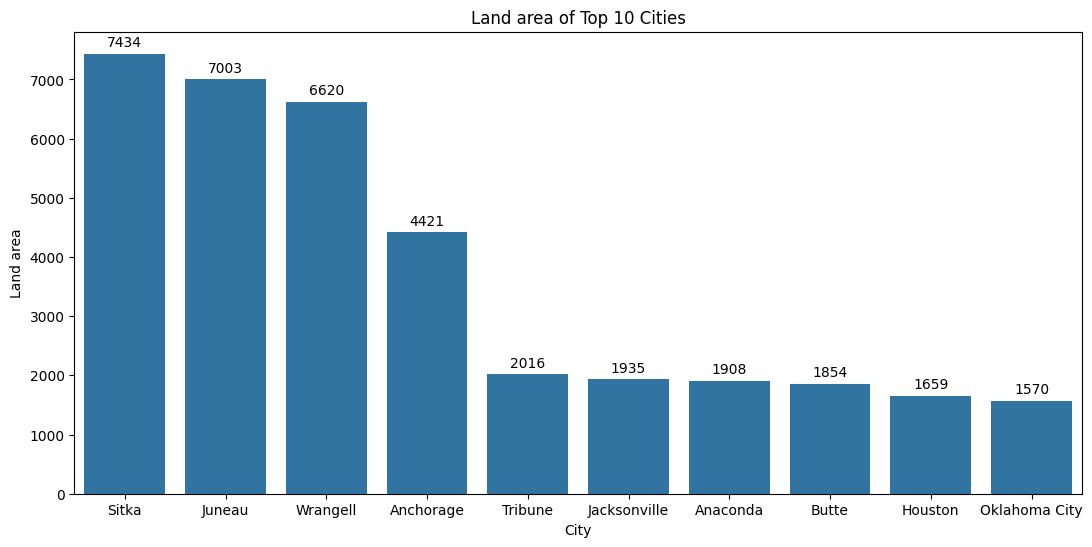

In [17]:
plt.figure(figsize=(13, 6))
plots = sns.barplot(x='City', y='Land area, km2', data=df_10_land) 

for bar in plots.patches: 
    plots.annotate(format(bar.get_height().astype(int)),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.ylabel('Land area')
plt.title('Land area of Top 10 Cities')
plt.show()

**Топ 10 городов страны по площади воды**

In [18]:
df = df.sort_values(by='Water area, km2', ascending=False)
df_10_water = df.head(10)

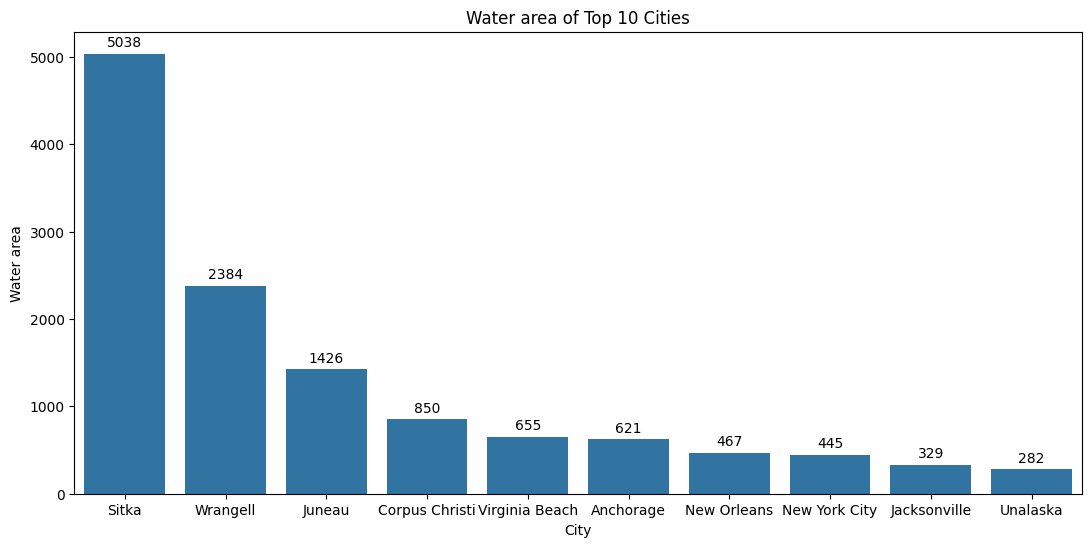

In [19]:
plt.figure(figsize=(13, 6))
plots = sns.barplot(x='City', y='Water area, km2', data=df_10_water) 

for bar in plots.patches: 
    plots.annotate(format(bar.get_height().astype(int)),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.ylabel('Water area')
plt.title('Water area of Top 10 Cities')
plt.show()

**Топ 10 городов страны по общей площади**

In [20]:
df = df.sort_values(by='Total area, km2', ascending=False)
df_10_total = df.head(10)

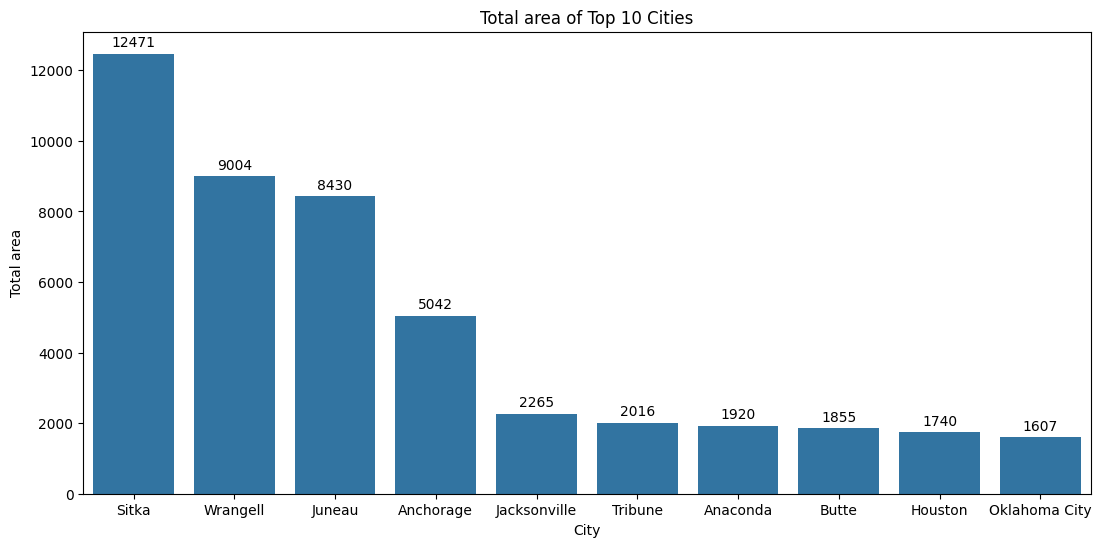

In [21]:
plt.figure(figsize=(13, 6))
plots = sns.barplot(x='City', y='Total area, km2', data=df_10_total) 

for bar in plots.patches: 
    plots.annotate(format(bar.get_height().astype(int)),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.ylabel('Total area')
plt.title('Total area of Top 10 Cities')
plt.show()

# Анализируем показатели (критерии) относительно штатов

Для этого суммироуем данные городов для каждого штата

In [22]:
# Берем все названия (значения) штатов и создаем датафрейм с одним этим столбцом (критерием)
d_state = {'State' : df['State'].unique()}
df_state = pd.DataFrame(data=d_state, index=df['State'].unique())

In [23]:
# В созданный датафрейм добавляем суммарные данные по каждому штату
for col in df.columns[3:]:
    df_state[col] = [df.loc[df['State'] == val, col].sum() for val in df_state['State']]

In [24]:
df_state

,State,"Land area, km2","Water area, km2","Total area, km2",Population (2020)
Alaska,Alaska,26550.0,9918.00,36467.0,342632
Florida,Florida,4451.0,580.06,5033.0,2524266
Kansas,Kansas,2759.0,21.30,2779.0,555321
Montana,Montana,3762.0,13.60,3775.0,43915
Texas,Texas,9098.0,1212.70,10310.0,9733594
Oklahoma,Oklahoma,3181.0,84.60,3265.0,1423944
Arizona,Arizona,6659.0,18.82,6675.0,3679373
California,California,4964.0,226.00,5192.0,8486936
Virginia,Virginia,2545.0,764.00,3309.0,803216
Tennessee,Tennessee,3735.0,132.90,3869.0,1910590


**Анализ по числу жителей**

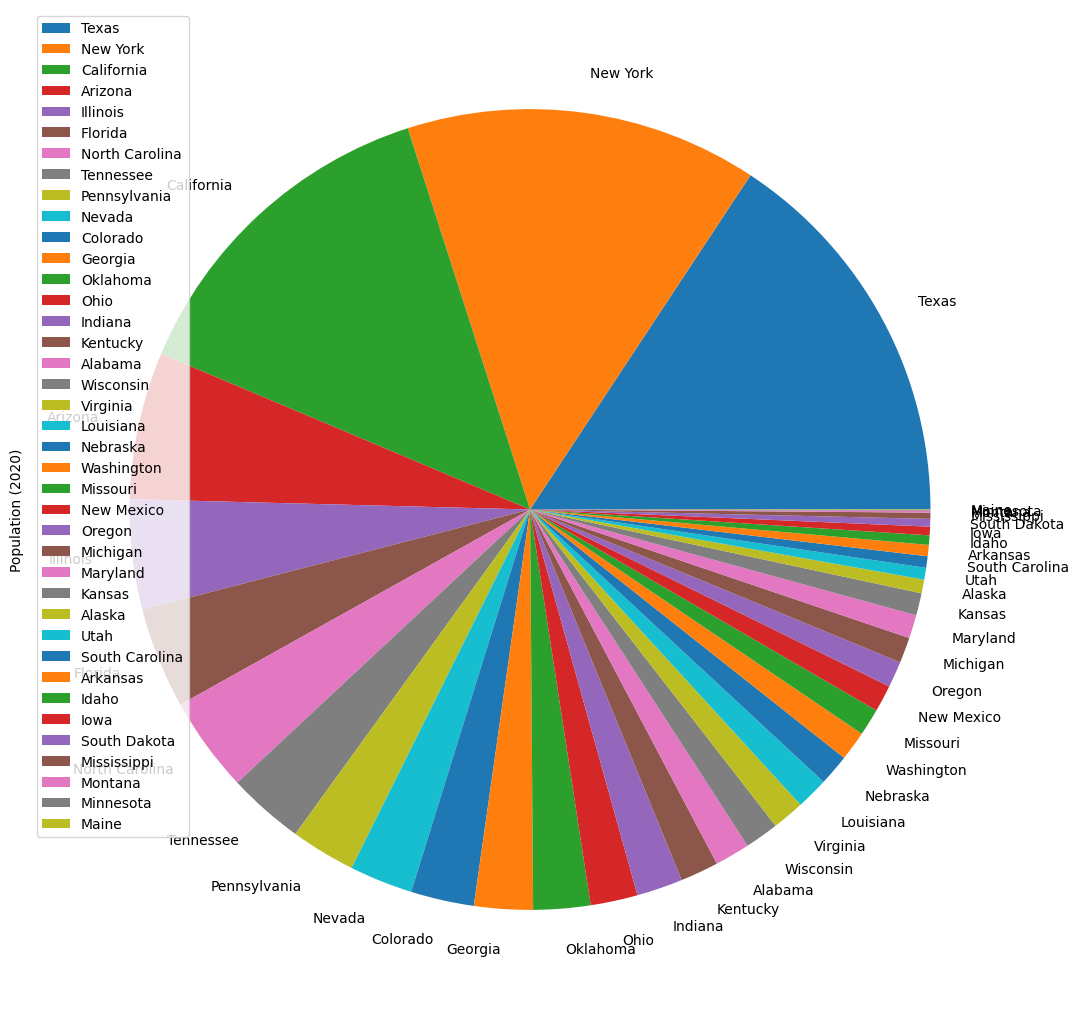

In [25]:
df_state = df_state.sort_values(by='Population (2020)', ascending=False)

plot = df_state.plot.pie(y='Population (2020)', figsize=(13, 13))

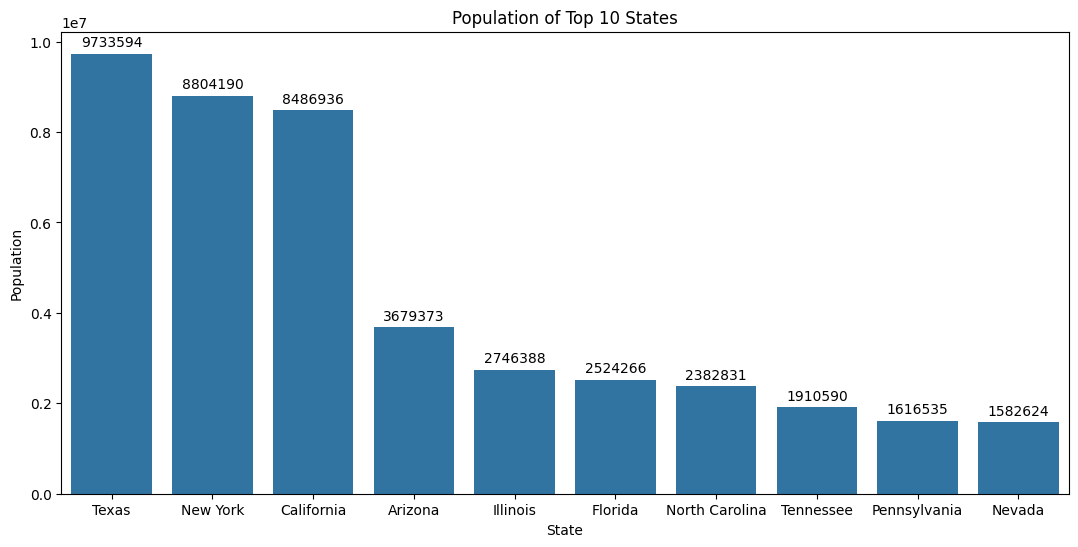

In [26]:
# Для удобства представления берем только топ 10 значений
plt.figure(figsize=(13, 6))
plots = sns.barplot(x='State', y='Population (2020)', data=df_state.head(10)) 

for bar in plots.patches: 
    plots.annotate(format(bar.get_height().astype(int)),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.ylabel('Population')
plt.title('Population of Top 10 States')
plt.show()

**Анализ по площади земли**

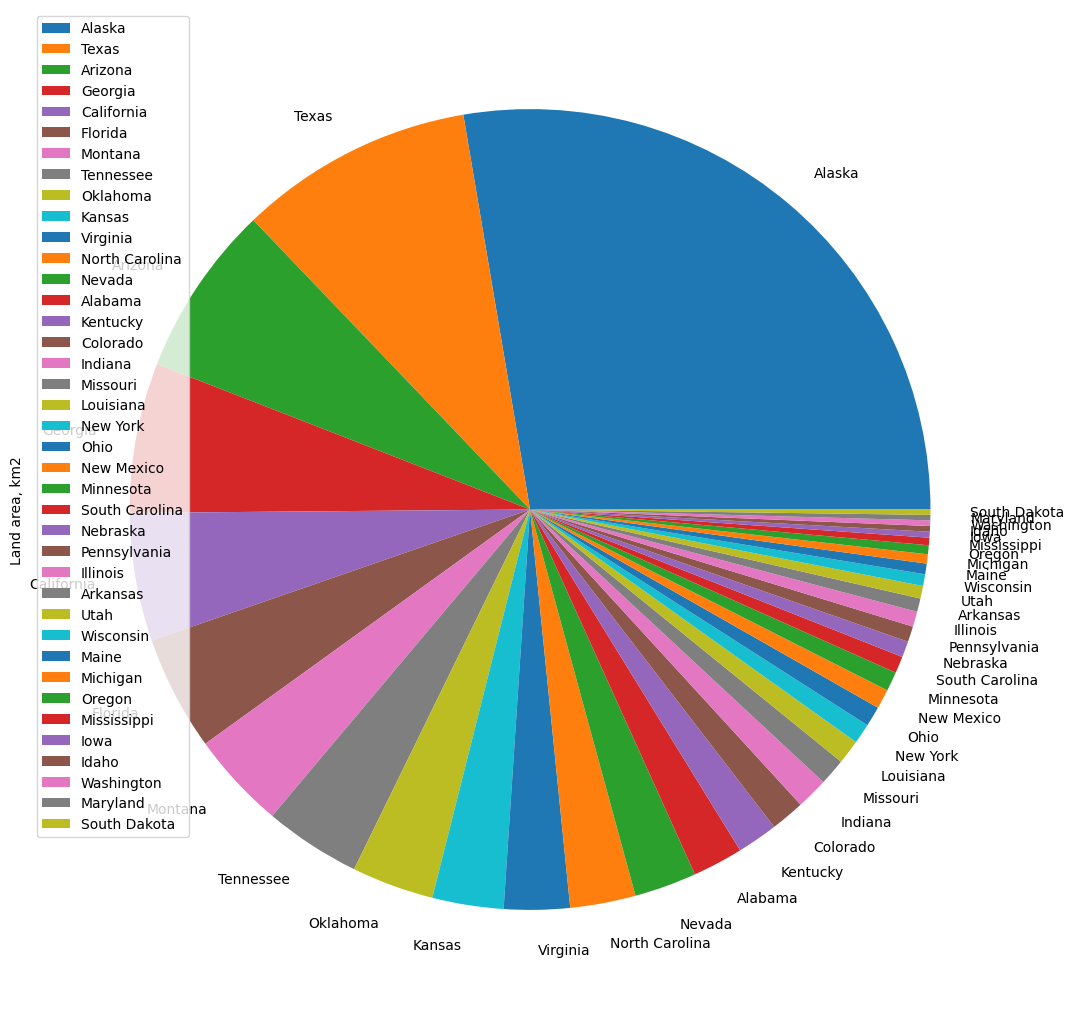

In [27]:
df_state = df_state.sort_values(by='Land area, km2', ascending=False)

plot = df_state.plot.pie(y='Land area, km2', figsize=(13, 13))

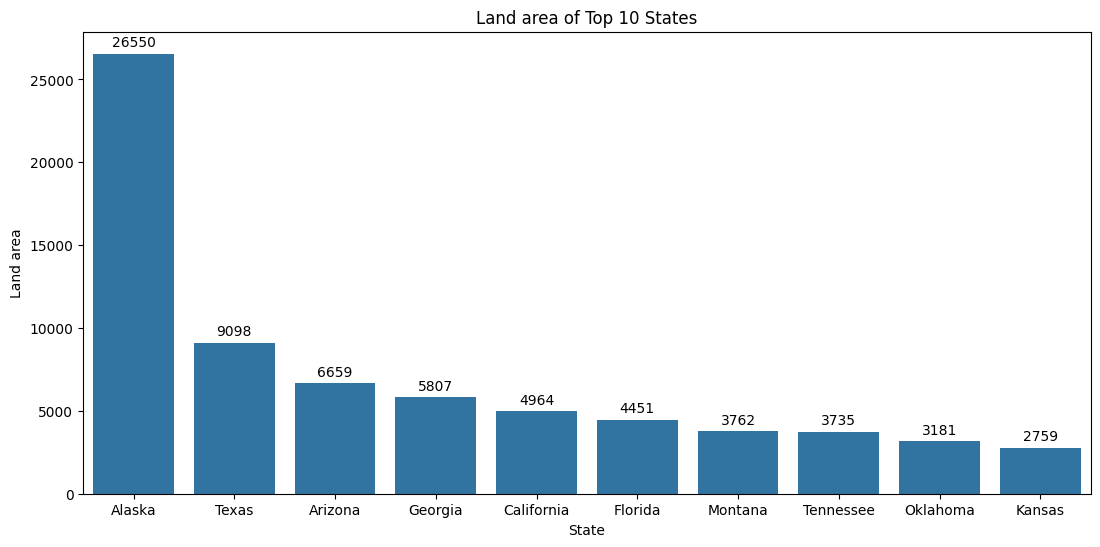

In [28]:
plt.figure(figsize=(13, 6))
plots = sns.barplot(x='State', y='Land area, km2', data=df_state.head(10)) 

for bar in plots.patches: 
    plots.annotate(format(bar.get_height().astype(int)),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.ylabel('Land area')
plt.title('Land area of Top 10 States')
plt.show()

**Анализ по площади воды**

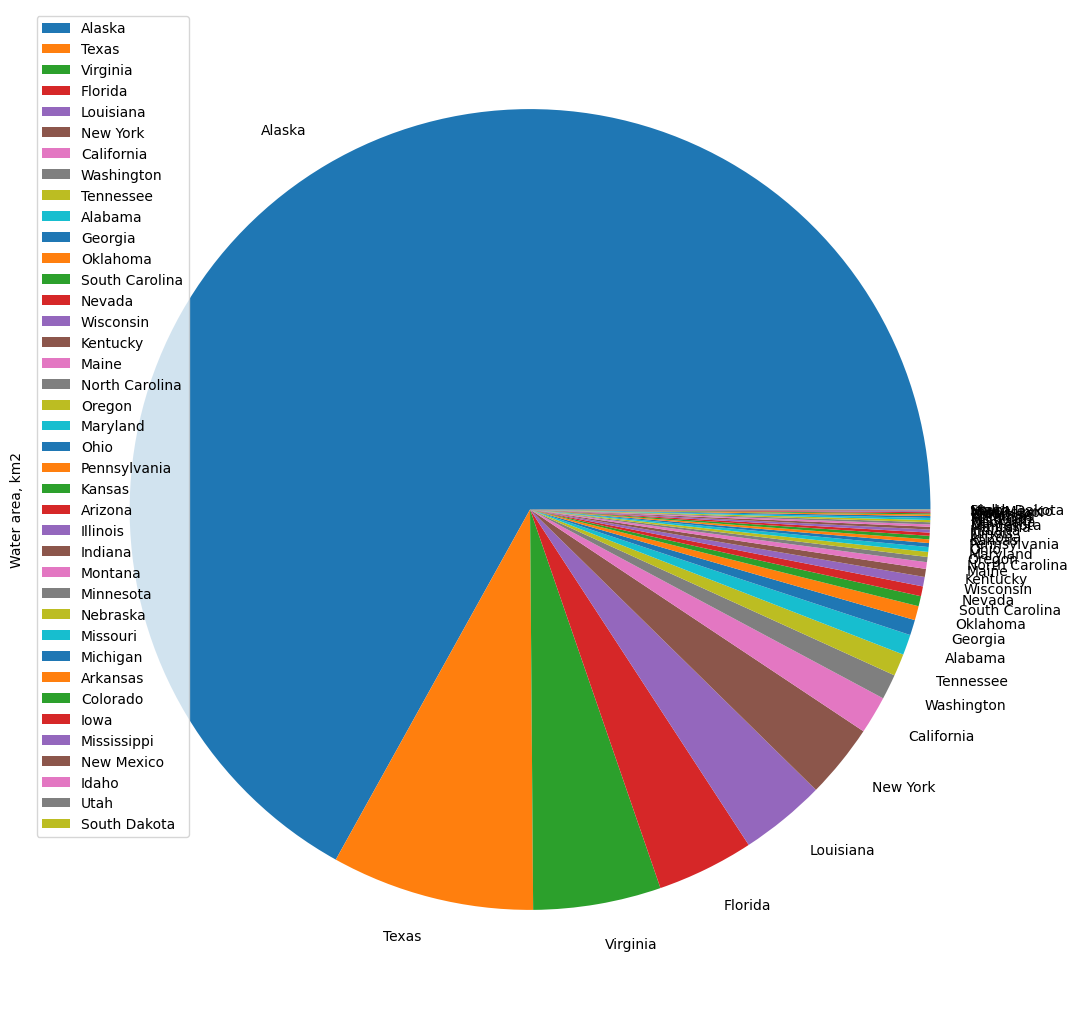

In [29]:
df_state = df_state.sort_values(by='Water area, km2', ascending=False)

plot = df_state.plot.pie(y='Water area, km2', figsize=(13, 13))

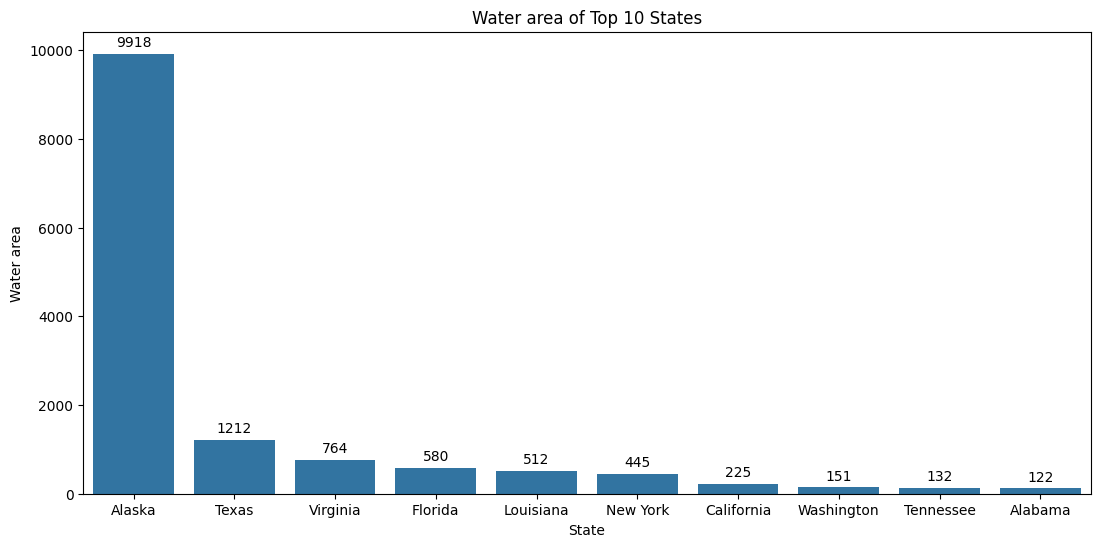

In [30]:
plt.figure(figsize=(13, 6))
plots = sns.barplot(x='State', y='Water area, km2', data=df_state.head(10)) 

for bar in plots.patches: 
    plots.annotate(format(bar.get_height().astype(int)),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.ylabel('Water area')
plt.title('Water area of Top 10 States')
plt.show()

**Анализ по общей площади**

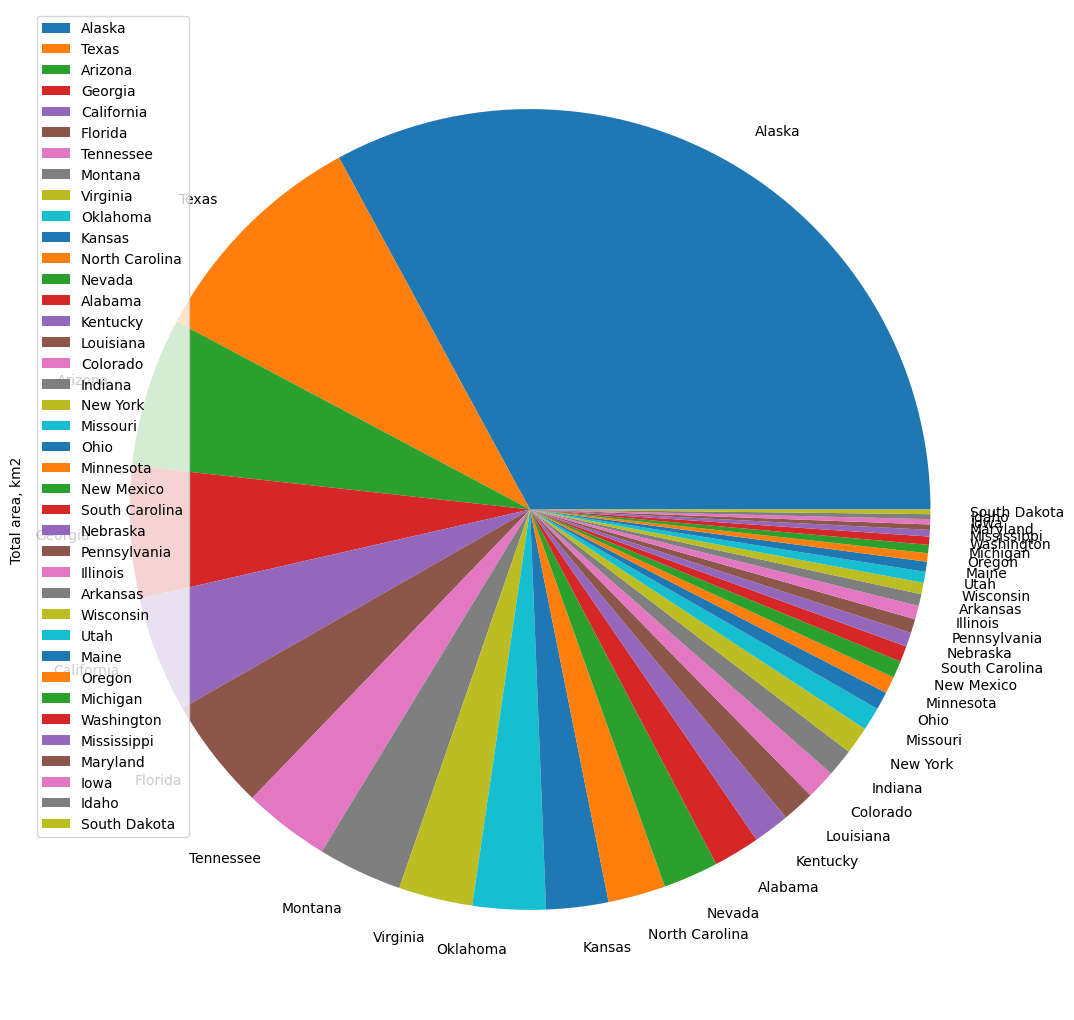

In [31]:
df_state = df_state.sort_values(by='Total area, km2', ascending=False)

plot = df_state.plot.pie(y='Total area, km2', figsize=(13, 13))

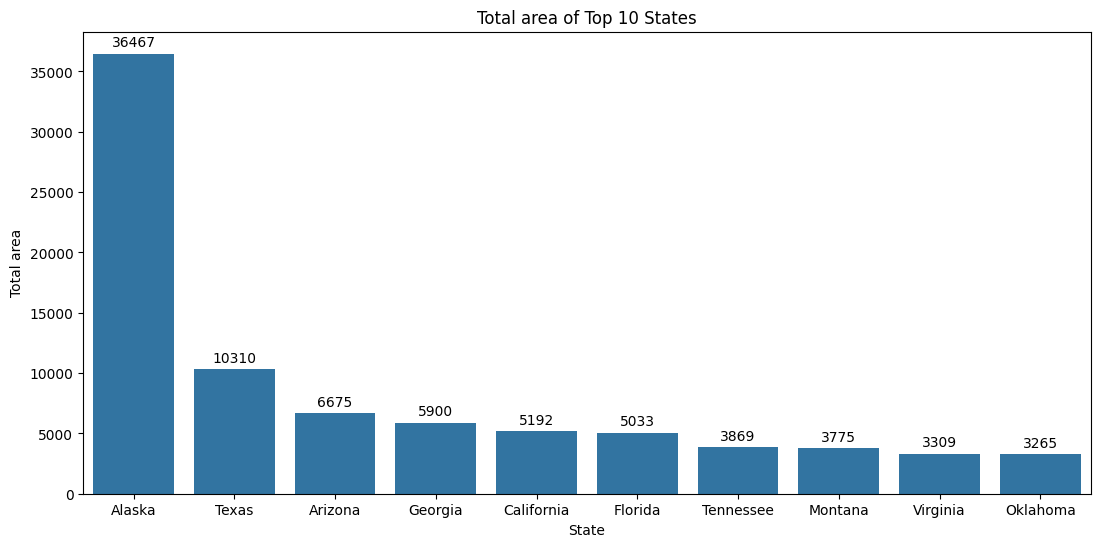

In [32]:
plt.figure(figsize=(13, 6))
plots = sns.barplot(x='State', y='Total area, km2', data=df_state.head(10)) 

for bar in plots.patches: 
    plots.annotate(format(bar.get_height().astype(int)),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.ylabel('Total area')
plt.title('Total area of Top 10 States')
plt.show()

# Анализ Топ города для каждого штата

В каждом штате выделим один город по определенному признаку:

1. Наибольшее население
2. Наибольшая площать земли
3. Наибольшая площать воды
4. Наибольшая общая площать

In [39]:
d = {'City':[], 'State':[], 'Land area, km2':[], 'Water area, km2':[], 'Total area, km2':[], 'Population (2020)':[]}
df_st = pd.DataFrame(data=d, columns=d.keys())
df_st_pop = pd.DataFrame(data=d, columns=d.keys())
df_st_l_ar = pd.DataFrame(data=d, columns=d.keys())
df_st_w_ar = pd.DataFrame(data=d, columns=d.keys())
df_st_t_ar = pd.DataFrame(data=d, columns=d.keys())


In [34]:
# Для каждой категории создаем отдельный датафрейм
for state in df['State'].unique():
    for str_data in df:
        df_st = df.loc[df['State'] == state]
    df_st_pop = df_st_pop.append(df_st.loc[df_st['Population (2020)'] == df_st['Population (2020)'].max()])
    df_st_l_ar = df_st_l_ar.append(df_st.loc[df_st['Land area, km2'] == df_st['Land area, km2'].max()])
    df_st_w_ar = df_st_w_ar.append(df_st.loc[df_st['Water area, km2'] == df_st['Water area, km2'].max()])
    df_st_t_ar = df_st_t_ar.append(df_st.loc[df_st['Total area, km2'] == df_st['Total area, km2'].max()])

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
df_st_pop = df_st_pop.sort_values(by='Population (2020)', ascending=False)
df_st_pop.head(10)

In [ ]:
df_st_l_ar = df_st_l_ar.sort_values(by='Land area, km2', ascending=False)
df_st_l_ar.head(10)

In [ ]:
df_st_w_ar = df_st_w_ar.sort_values(by='Water area, km2', ascending=False)
df_st_w_ar.head(10)

In [ ]:
df_st_t_ar = df_st_t_ar.sort_values(by='Total area, km2', ascending=False)
df_st_t_ar.head(10)

# Вывод

В ходе выполнения анализа получено:

1. Для городов:
* Город с самым большим населением - New York City (штат New York)
* Город с самой большой площадью земли - Sitka (штат Alaska)
* Город с самой большой площадью воды - Sitka (штат Alaska)
* Город с самой большой общей площадью - Sitka (штат Alaska)

2. Для штатов:
* Штат с самым большим населением - Texas
* Штат с самой большой площадью земли - Alaska
* Штат с самой большой площадью воды - Alaska
* Штат с самой большой общей площадью - Alaska